# E-Commerce Sales Analysis Project 

## 1. Data Collection & Preprocessing
## 2. Data Analysis & Extracting Insights
## 3. Model Development
## 4. Results & Discussion

In [186]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the unstructured dataset
file_path = r"D:\6th Smester\DS\New folder\ecommerce_dataset_unstructured.csv"
df = pd.read_csv(file_path, encoding="utf-8")

In [5]:
# Display the first 10 rows of the dataset
print(df.head(10))

    User_ID  Product_ID        Category  Price (Rs.)  Discount (%)  \
0  337c166f  f414122f-e          Sports    45.932812      7.855373   
1  d38a19bf  fde50f9c-5        Clothing   279.270597     10.473830   
2  d7f5f0b0  0d96fc90-3          Sports   390.207700     13.092288   
3  395d4994  964fc44b-d            Toys   209.342651     13.092288   
4  a83c145c  d70e2fc6-e          Beauty  1217.711600     10.473830   
5  3fdcdae8  0816ee12-5           Books   309.137806     26.184575   
6  12772337  d41e0b55-c            Toys    96.978799      2.618458   
7  9f0194af  83b7dc04-5          Sports   278.881079     10.473830   
8  7a8559d8  87c9c896-1          Sports   496.642634      2.618458   
9  8911f0d1  31308875-b  Home & Kitchen   513.896591     26.184575   

   Final_Price(Rs.) Payment_Method Purchase_Date  
0         16.756340    Net Banking    2024-10-14  
1        102.575680    Net Banking    2024-09-20  
2               NaN    Credit Card    2024-03-01  
3         73.519080      

# 1. Data Collection & Preprocessing

In [7]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

In [9]:
# Handling Missing Values
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [13]:
# Handling Outliers using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

In [15]:
# Fixing Normalization Issues using Min-Max Scaling
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [17]:
# Fixing Category Name Typos
category_corrections = {
    "Sprots": "Sports",
    "Clothng": "Clothing",
    "Toyz": "Toys",
    "Beauti": "Beauty"
}
df["Category"] = df["Category"].replace(category_corrections)

In [21]:
# Step 6: Save Cleaned Data
cleaned_file_path = r"D:\6th Smester\DS\New folder\ecommerce_dataset_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved at: {cleaned_file_path}")

Cleaned dataset saved at: D:\6th Smester\DS\New folder\ecommerce_dataset_cleaned.csv


In [23]:
# Display the first 10 rows of the dataset
print(df.head(10))

    User_ID  Product_ID        Category  Price (Rs.)  Discount (%)  \
0  337c166f  f414122f-e          Sports     0.039205      0.315789   
1  d38a19bf  fde50f9c-5        Clothing     0.307707      0.421053   
2  d7f5f0b0  0d96fc90-3          Sports     0.435362      0.526316   
3  395d4994  964fc44b-d            Toys     0.227241      0.526316   
4  a83c145c  d70e2fc6-e          Beauty     1.000000      0.421053   
5  3fdcdae8  0816ee12-5           Books     0.342075      1.000000   
6  12772337  d41e0b55-c            Toys     0.097944      0.105263   
7  9f0194af  83b7dc04-5          Sports     0.307259      0.421053   
8  7a8559d8  87c9c896-1          Sports     0.557837      0.105263   
9  8911f0d1  31308875-b  Home & Kitchen     0.577691      1.000000   

   Final_Price(Rs.) Payment_Method Purchase_Date  
0          0.042816    Net Banking    2024-10-14  
1          0.310024    Net Banking    2024-09-20  
2          0.334728    Credit Card    2024-03-01  
3          0.219553      

In [25]:
# Load dataset unstructured dataset befor data cleaning
# Load dataset
file_path = r"D:\6th Smester\DS\New folder\ecommerce_dataset_unstructured.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# Display basic dataset info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           70000 non-null  object 
 1   Product_ID        70000 non-null  object 
 2   Category          70000 non-null  object 
 3   Price (Rs.)       63229 non-null  float64
 4   Discount (%)      66536 non-null  float64
 5   Final_Price(Rs.)  66531 non-null  float64
 6   Payment_Method    70000 non-null  object 
 7   Purchase_Date     70000 non-null  object 
dtypes: float64(3), object(5)
memory usage: 4.3+ MB
None
    User_ID  Product_ID  Category  Price (Rs.)  Discount (%)  \
0  337c166f  f414122f-e    Sports    45.932812      7.855373   
1  d38a19bf  fde50f9c-5  Clothing   279.270597     10.473830   
2  d7f5f0b0  0d96fc90-3    Sports   390.207700     13.092288   
3  395d4994  964fc44b-d      Toys   209.342651     13.092288   
4  a83c145c  d70e2fc6-e    Beauty  1217.71160

In [27]:
# Statistical summary
stats_summary = df.describe()
print(stats_summary)


        Price (Rs.)  Discount (%)  Final_Price(Rs.)
count  63229.000000  66536.000000      66531.000000
mean     331.392893     10.259457        117.351534
std      201.384532      8.627513         75.622578
min       11.862315      0.000000          3.005222
25%      170.124359      2.618458         57.631169
50%      323.291760      7.855373        110.509672
75%      480.742460     13.092288        169.186002
max     1217.711600     48.440322        452.058516


In [31]:
# Set a professional visualization style
sns.set_style("whitegrid")

In [33]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           70000 non-null  object 
 1   Product_ID        70000 non-null  object 
 2   Category          70000 non-null  object 
 3   Price (Rs.)       63229 non-null  float64
 4   Discount (%)      66536 non-null  float64
 5   Final_Price(Rs.)  66531 non-null  float64
 6   Payment_Method    70000 non-null  object 
 7   Purchase_Date     70000 non-null  object 
dtypes: float64(3), object(5)
memory usage: 4.3+ MB
None


Missing Values:
 User_ID                0
Product_ID             0
Category               0
Price (Rs.)         6771
Discount (%)        3464
Final_Price(Rs.)    3469
Payment_Method         0
Purchase_Date          0
dtype: int64


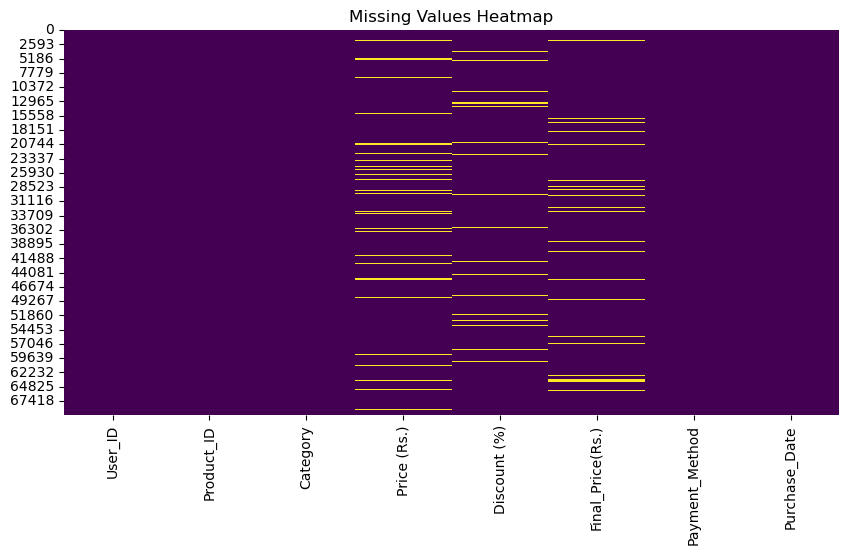

In [29]:
# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


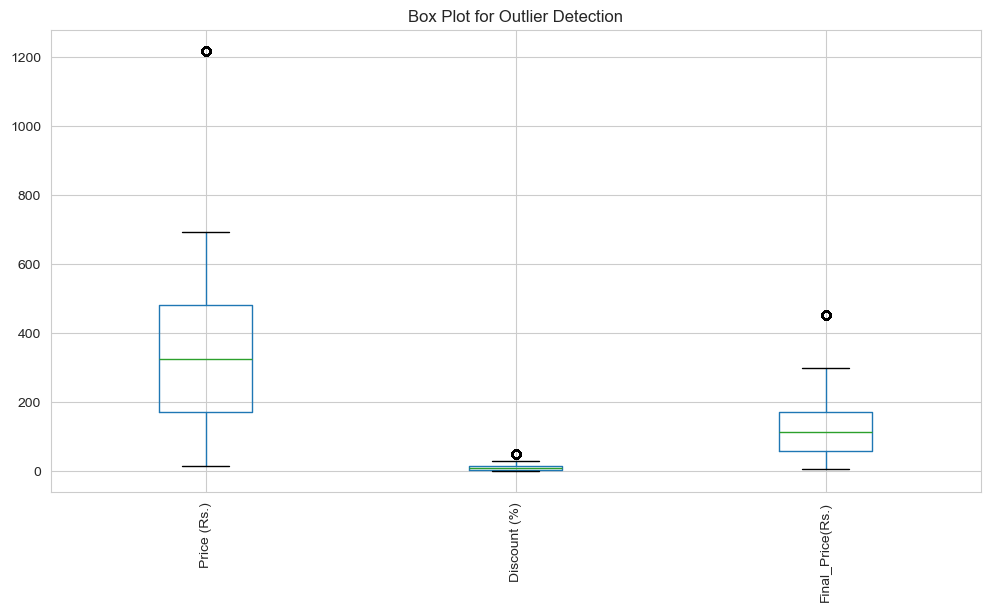

In [35]:
# Detect and visualize outliers using box plots
plt.figure(figsize=(12, 6))
df.select_dtypes(include=[np.number]).boxplot(rot=90)
plt.title("Box Plot for Outlier Detection")
plt.show()

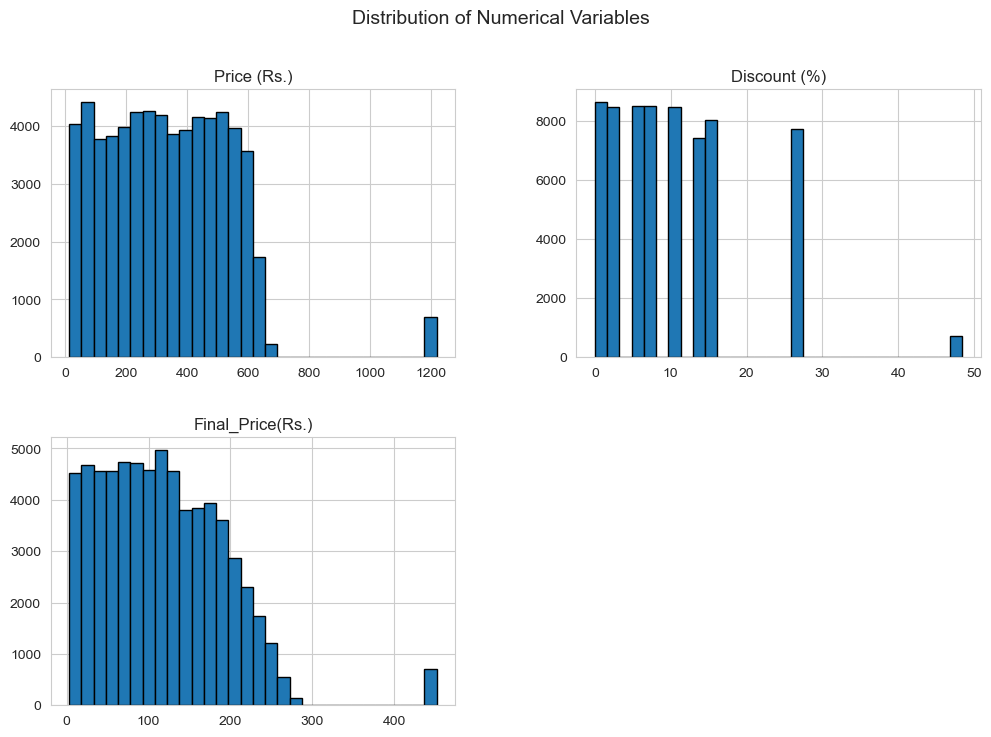

In [37]:
# Histograms for numerical variables
df.select_dtypes(include=[np.number]).hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Variables", fontsize=14)
plt.show()

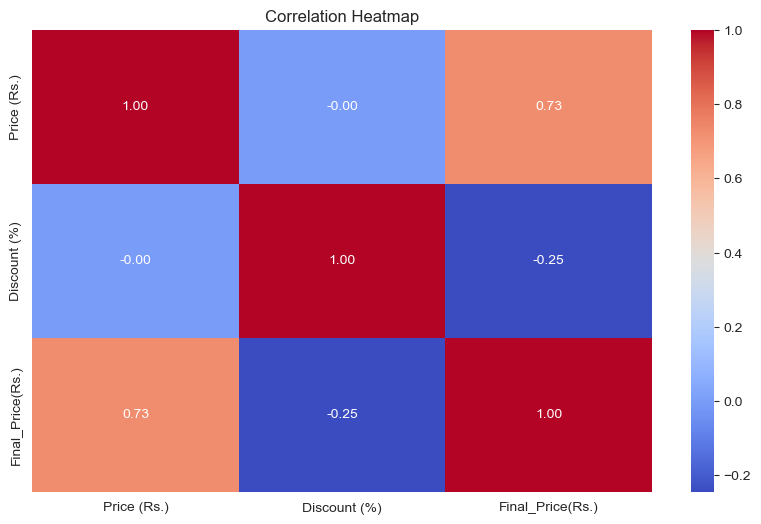

In [39]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

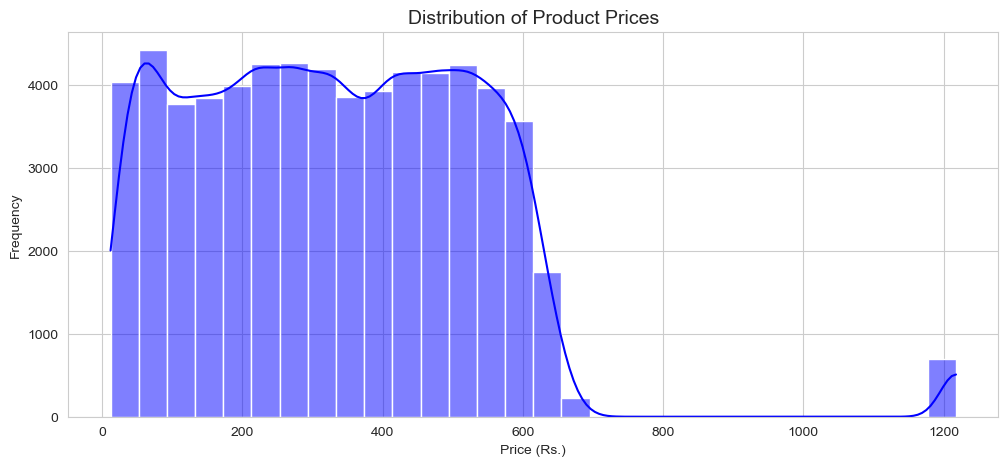

In [41]:
plt.figure(figsize=(12, 5))
sns.histplot(df["Price (Rs.)"].dropna(), bins=30, kde=True, color="blue")
plt.title("Distribution of Product Prices", fontsize=14)
plt.xlabel("Price (Rs.)")
plt.ylabel("Frequency")
plt.show()


C:\Users\Eden computers\AppData\Local\Temp\ipykernel_7516\1786103607.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Category"], order=df["Category"].value_counts().index, palette="coolwarm")


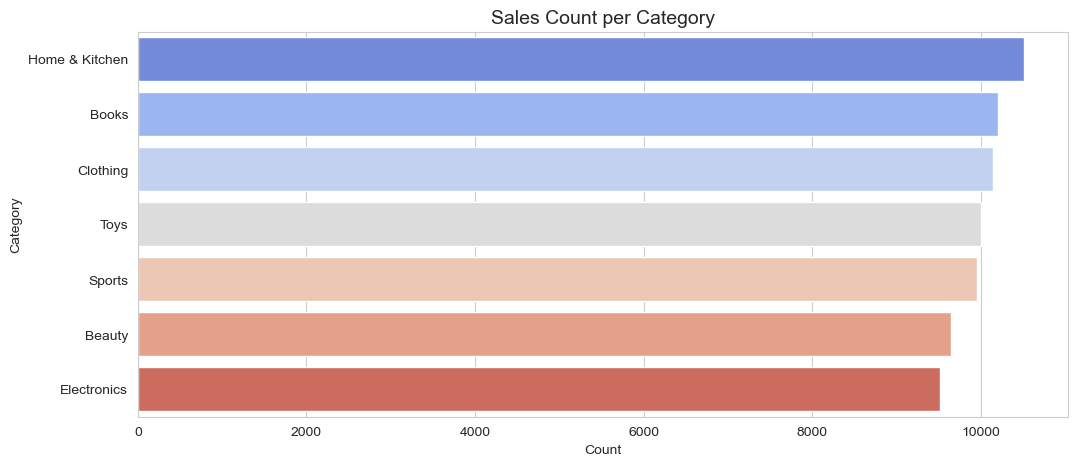

In [43]:
plt.figure(figsize=(12, 5))
sns.countplot(y=df["Category"], order=df["Category"].value_counts().index, palette="coolwarm")
plt.title("Sales Count per Category", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()


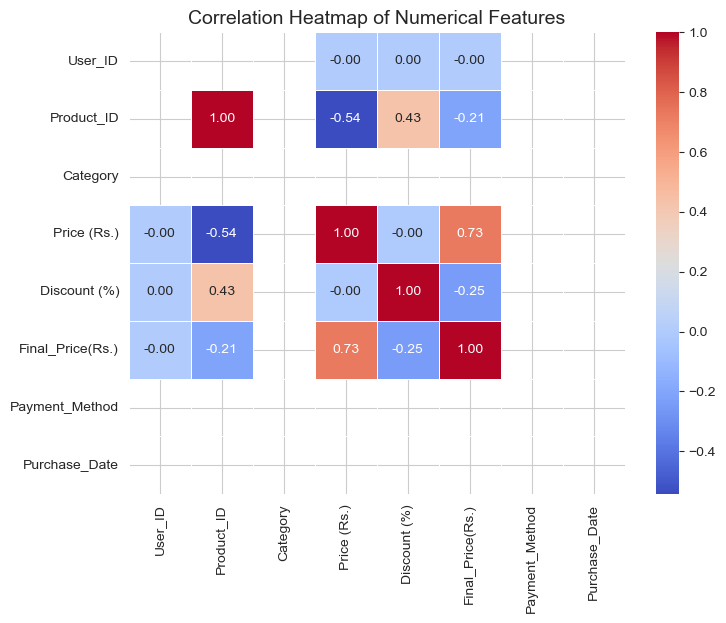

In [45]:
# Convert all non-numeric values to NaN (ignoring errors)
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Compute correlation only for numeric columns
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

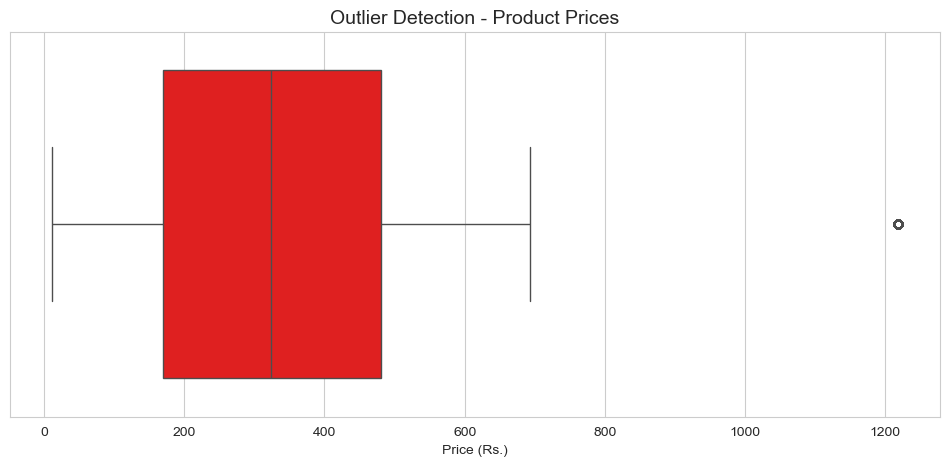

In [47]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["Price (Rs.)"], color="red")
plt.title("Outlier Detection - Product Prices", fontsize=14)
plt.show()


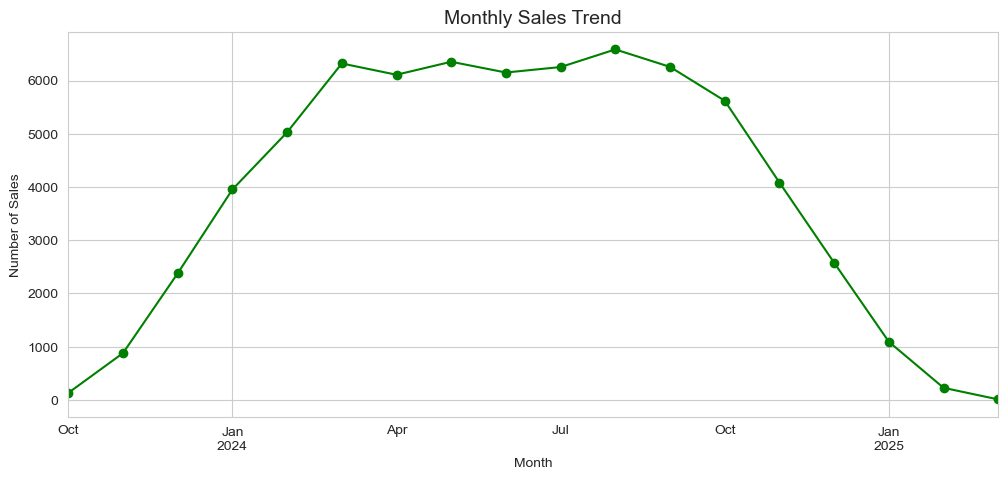

In [49]:
# Convert Purchase_Date to datetime format
df["Purchase_Date"] = pd.to_datetime(df["Purchase_Date"], errors='coerce')

# Aggregate sales per month
df_time_series = df.groupby(df["Purchase_Date"].dt.to_period("M")).size()

plt.figure(figsize=(12, 5))
df_time_series.plot(kind="line", marker="o", color="green")
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.grid(True)
plt.show()


In [57]:
# Step 1: Load the Structured Dataset
file_path = r"D:\6th Smester\DS\New folder\ecommerce_dataset_cleaned.csv"
df = pd.read_csv(file_path, encoding="utf-8")

# Display dataset information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           70000 non-null  object 
 1   Product_ID        70000 non-null  object 
 2   Category          70000 non-null  object 
 3   Price (Rs.)       70000 non-null  float64
 4   Discount (%)      70000 non-null  float64
 5   Final_Price(Rs.)  70000 non-null  float64
 6   Payment_Method    70000 non-null  object 
 7   Purchase_Date     70000 non-null  object 
dtypes: float64(3), object(5)
memory usage: 4.3+ MB
None
    User_ID  Product_ID  Category  Price (Rs.)  Discount (%)  \
0  337c166f  f414122f-e    Sports     0.039205      0.315789   
1  d38a19bf  fde50f9c-5  Clothing     0.307707      0.421053   
2  d7f5f0b0  0d96fc90-3    Sports     0.435362      0.526316   
3  395d4994  964fc44b-d      Toys     0.227241      0.526316   
4  a83c145c  d70e2fc6-e    Beauty     1.00000

In [59]:
# Statistical summary
stats_summary = df.describe()
print(stats_summary)


        Price (Rs.)  Discount (%)  Final_Price(Rs.)
count  70000.000000  70000.000000      70000.000000
mean       0.362907      0.392357          0.350993
std        0.205153      0.295199          0.214423
min        0.000000      0.000000          0.000000
25%        0.201859      0.210526          0.178644
50%        0.358362      0.315789          0.334728
75%        0.521116      0.526316          0.507187
max        1.000000      1.000000          1.000000


In [61]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           70000 non-null  object 
 1   Product_ID        70000 non-null  object 
 2   Category          70000 non-null  object 
 3   Price (Rs.)       70000 non-null  float64
 4   Discount (%)      70000 non-null  float64
 5   Final_Price(Rs.)  70000 non-null  float64
 6   Payment_Method    70000 non-null  object 
 7   Purchase_Date     70000 non-null  object 
dtypes: float64(3), object(5)
memory usage: 4.3+ MB
None


In [79]:
# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values Heatmap After cleaning Data
")
plt.show()


SyntaxError: unterminated string literal (detected at line 8) (1833706674.py, line 8)

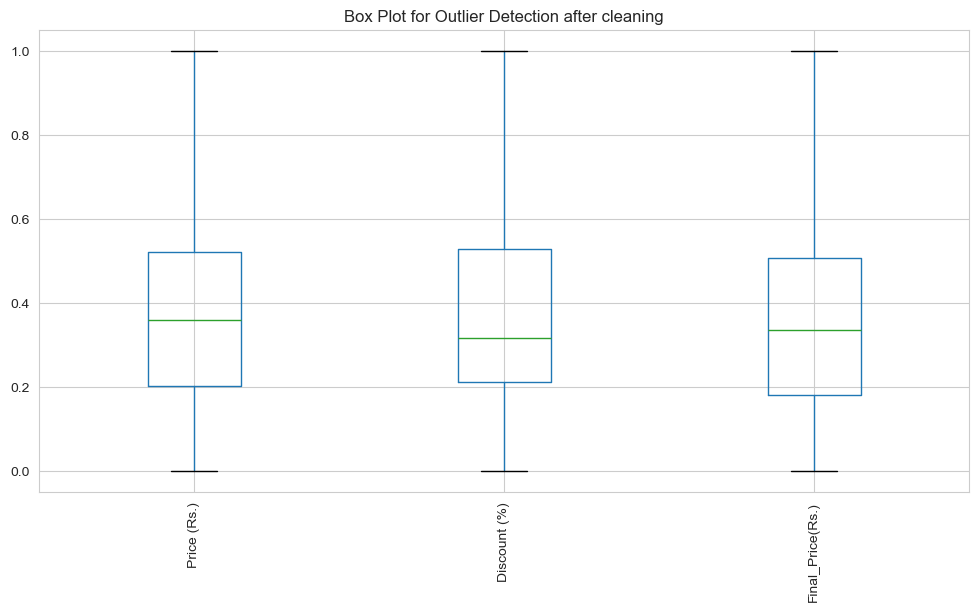

In [77]:
# Detect and visualize outliers using box plots
plt.figure(figsize=(12, 6))
df.select_dtypes(include=[np.number]).boxplot(rot=90)
plt.title("Box Plot for Outlier Detection after cleaning")
plt.show()

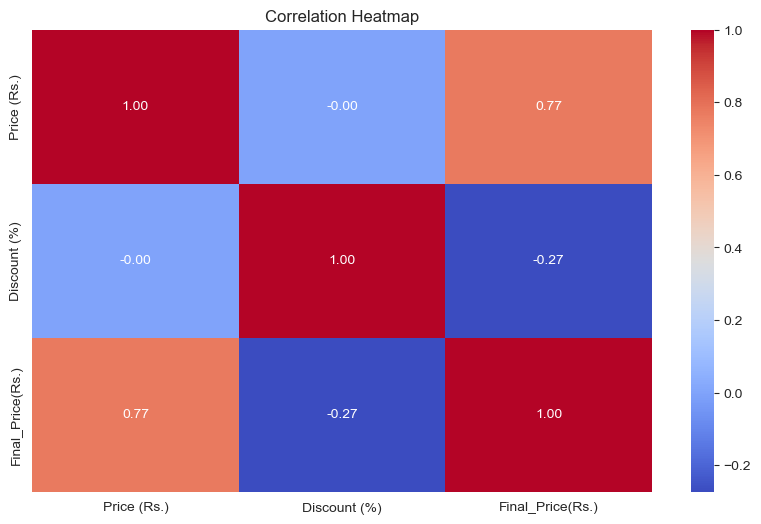

In [67]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

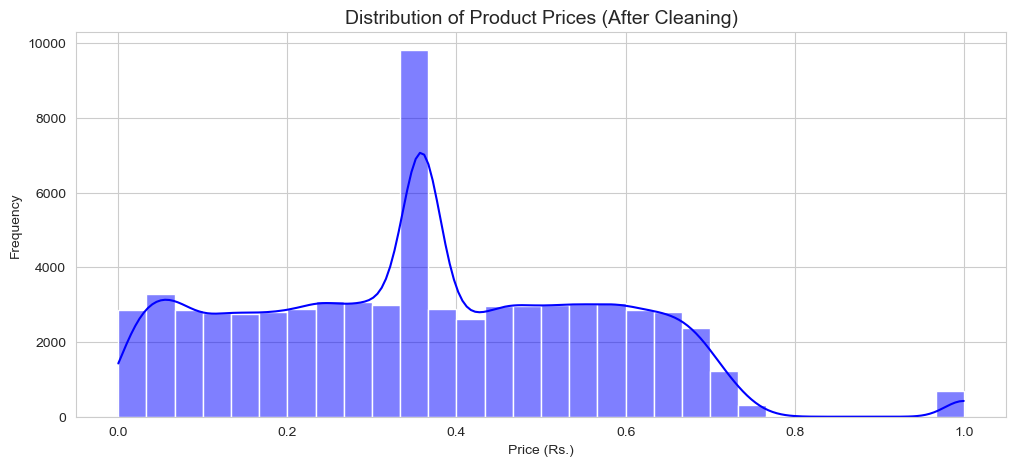

In [87]:
#Step 4:  Distribution of Product Prices
plt.figure(figsize=(12, 5))
sns.histplot(df["Price (Rs.)"].dropna(), bins=30, kde=True, color="blue")
plt.title("Distribution of Product Prices (After Cleaning)", fontsize=14)
plt.xlabel("Price (Rs.)")
plt.ylabel("Frequency")
plt.show()


C:\Users\Eden computers\AppData\Local\Temp\ipykernel_7516\2523301219.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Category"], order=df["Category"].value_counts().index, palette="coolwarm")


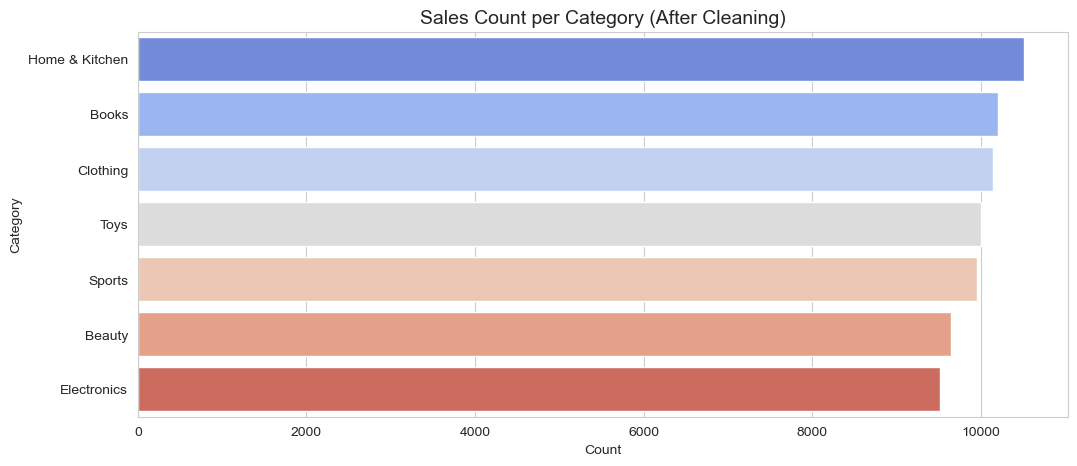

In [89]:
#Step 5: Category-wise Sales Trends

plt.figure(figsize=(12, 5))
sns.countplot(y=df["Category"], order=df["Category"].value_counts().index, palette="coolwarm")
plt.title("Sales Count per Category (After Cleaning)", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

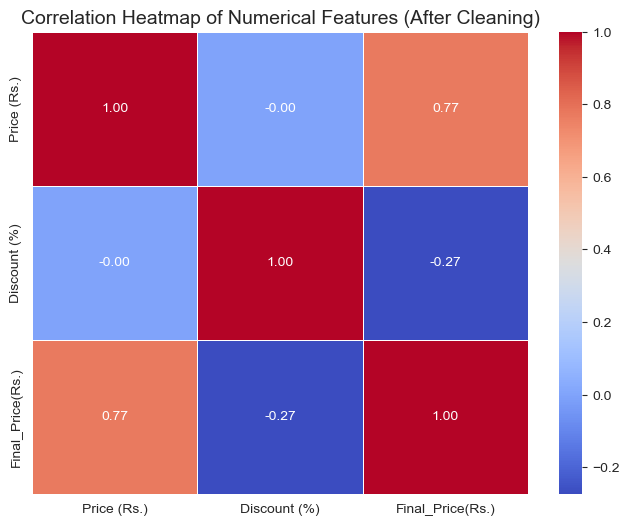

In [91]:
#Step 6: Correlation Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features (After Cleaning)", fontsize=14)
plt.show()

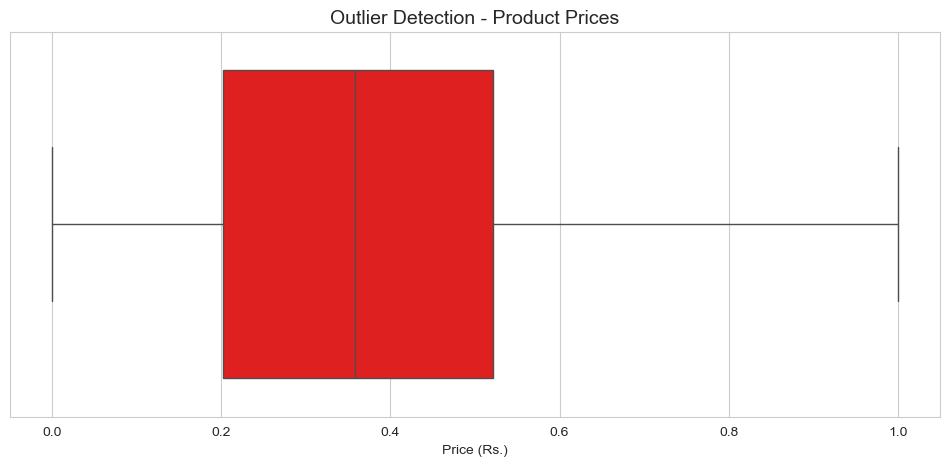

In [75]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["Price (Rs.)"], color="red")
plt.title("Outlier Detection - Product Prices", fontsize=14)
plt.show()


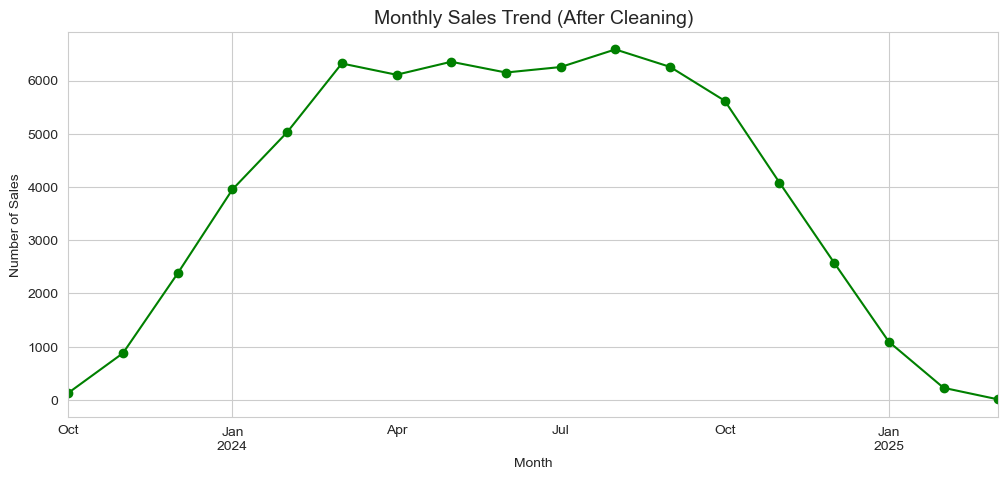

In [93]:
#Step 8: Time-Series Analysis of Sales

# Convert Purchase_Date to datetime format
df["Purchase_Date"] = pd.to_datetime(df["Purchase_Date"], errors='coerce')

# Aggregate sales per month
df_time_series = df.groupby(df["Purchase_Date"].dt.to_period("M")).size()

plt.figure(figsize=(12, 5))
df_time_series.plot(kind="line", marker="o", color="green")
plt.title("Monthly Sales Trend (After Cleaning)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Sales")
plt.grid(True)
plt.show()

In [96]:



cleaned_file_path = r"D:\6th Smester\DS\New folder\ecommerce_dataset_cleaned_final.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Final cleaned dataset saved at: {cleaned_file_path}")


Final cleaned dataset saved at: D:\6th Smester\DS\New folder\ecommerce_dataset_cleaned_final.csv


# 2. Data Analysis & Extracting Insights

In [100]:

# Load Dataset

file_path = r"D:\6th Smester\DS\New folder\ecommerce_dataset_cleaned_final.csv"  # Update path if needed
df = pd.read_csv(file_path)

In [102]:
# Convert 'Purchase_Date' to datetime format
df["Purchase_Date"] = pd.to_datetime(df["Purchase_Date"], errors="coerce")

In [104]:
# Fix Category names (if any spelling errors exist)
df["Category"] = df["Category"].str.strip().str.capitalize()
df["Category"].replace({"Sprots": "Sports", "Clothng": "Clothing", "Toyz": "Toys", "Beauti": "Beauty"}, inplace=True)

C:\Users\Eden computers\AppData\Local\Temp\ipykernel_7516\3919104064.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Category"].replace({"Sprots": "Sports", "Clothng": "Clothing", "Toyz": "Toys", "Beauti": "Beauty"}, inplace=True)


In [106]:
# Drop any 'Unknown' payment methods
df = df[df["Payment_Method"] != "Unknown"]

In [108]:
# Set Seaborn style
sns.set_style("whitegrid")

In [116]:
# 1️⃣ Data Overview & Summary Statistics
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nUnique Values per Column:\n", df.nunique())
print("\nDescriptive Statistics:\n", df.describe())

Dataset Shape: (70000, 8)

Missing Values:
 User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64

Unique Values per Column:
 User_ID              3660
Product_ID           3660
Category                7
Price (Rs.)         62530
Discount (%)            8
Final_Price(Rs.)    65832
Payment_Method          5
Purchase_Date         514
dtype: int64

Descriptive Statistics:
         Price (Rs.)  Discount (%)  Final_Price(Rs.)  \
count  70000.000000  70000.000000      70000.000000   
mean       0.362907      0.392357          0.350993   
min        0.000000      0.000000          0.000000   
25%        0.201859      0.210526          0.178644   
50%        0.358362      0.315789          0.334728   
75%        0.521116      0.526316          0.507187   
max        1.000000      1.000000          1.000000   
std        0.205153      0.295199          0.214423 

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


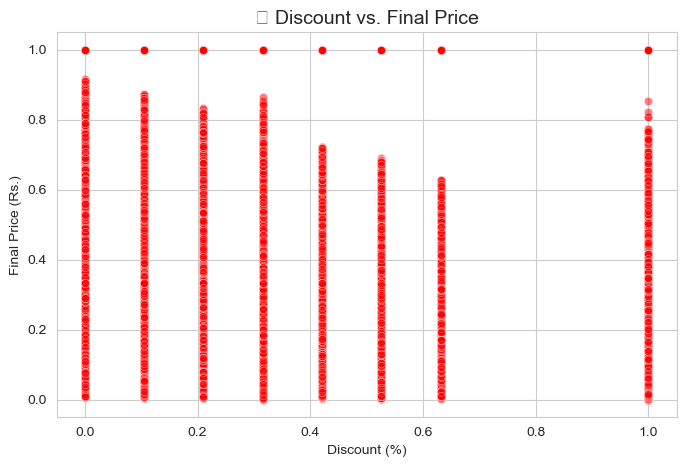

In [114]:
### 3️⃣ Impact of Discounts on Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Discount (%)"], y=df["Final_Price(Rs.)"], alpha=0.5, color="r")
plt.title("💰 Discount vs. Final Price", fontsize=14)
plt.xlabel("Discount (%)")
plt.ylabel("Final Price (Rs.)")
plt.show()

C:\Users\Eden computers\AppData\Local\Temp\ipykernel_7516\3256307647.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Payment_Method"], order=df["Payment_Method"].value_counts().index, palette="coolwarm")
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


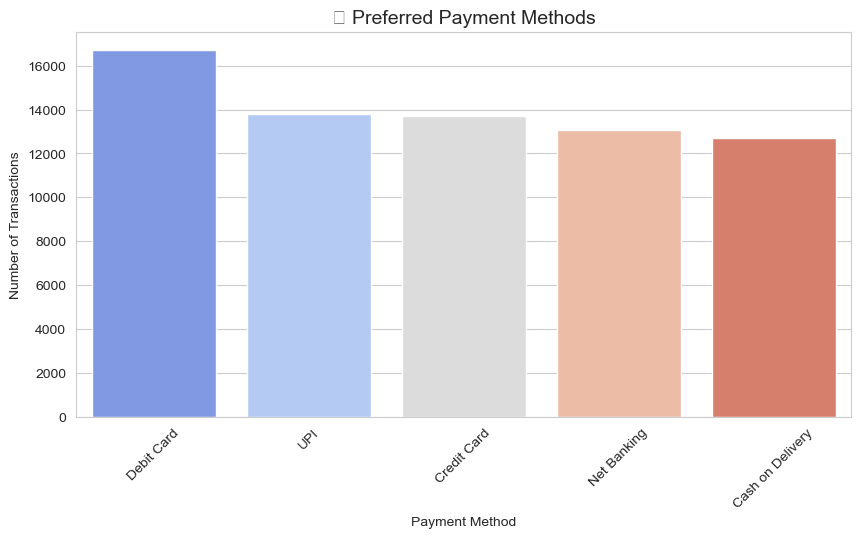

In [128]:

### 4️⃣ Preferred Payment Methods
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Payment_Method"], order=df["Payment_Method"].value_counts().index, palette="coolwarm")
plt.title("💳 Preferred Payment Methods", fontsize=14)
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


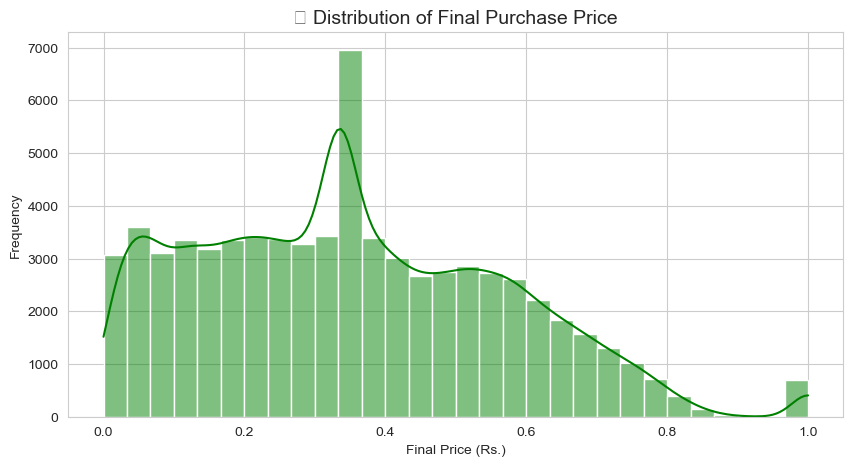

In [130]:
### 5️⃣ Customer Spending Patterns (Histogram)
plt.figure(figsize=(10, 5))
sns.histplot(df["Final_Price(Rs.)"], bins=30, kde=True, color="green")
plt.title("📊 Distribution of Final Purchase Price", fontsize=14)
plt.xlabel("Final Price (Rs.)")
plt.ylabel("Frequency")
plt.show()

C:\Users\Eden computers\AppData\Local\Temp\ipykernel_7516\799660382.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_order_value.values, y=avg_order_value.index, palette="magma")
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


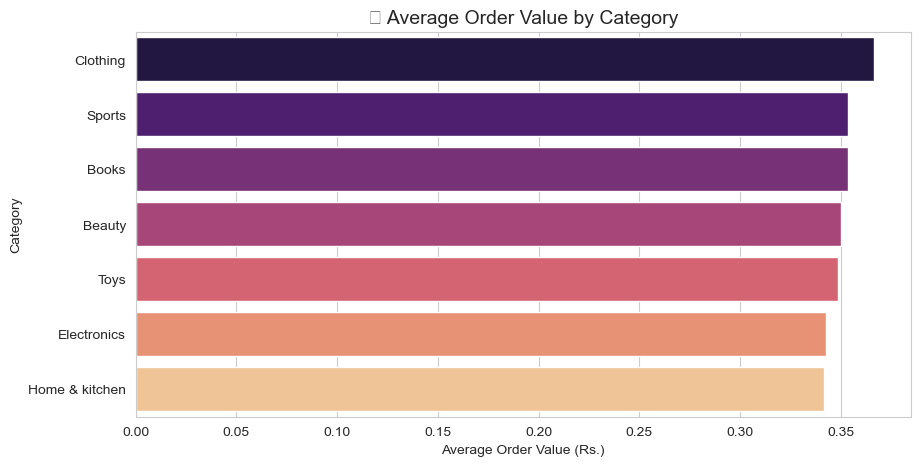

In [132]:
### 6️⃣ Average Order Value per Category
avg_order_value = df.groupby("Category")["Final_Price(Rs.)"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_order_value.values, y=avg_order_value.index, palette="magma")
plt.title("📌 Average Order Value by Category", fontsize=14)
plt.xlabel("Average Order Value (Rs.)")
plt.ylabel("Category")
plt.show()


D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


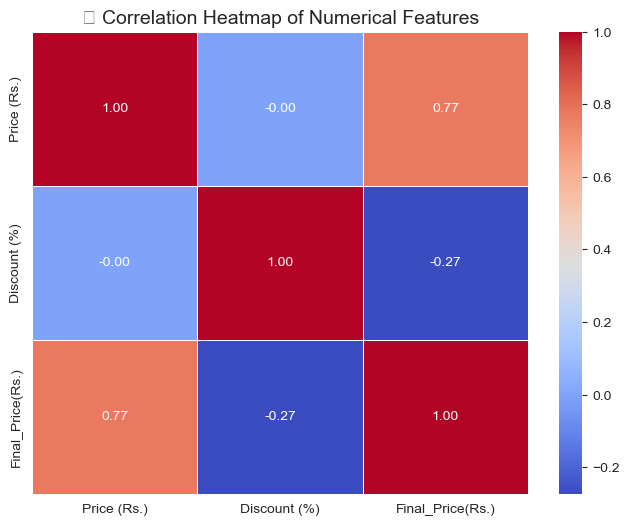

In [134]:
# Load Dataset
file_path = r"D:\6th Smester\DS\New folder\ecommerce_dataset_cleaned_final.csv"  # Update if needed
df = pd.read_csv(file_path)

# Convert 'Purchase_Date' to datetime (if exists)
if "Purchase_Date" in df.columns:
    df["Purchase_Date"] = pd.to_datetime(df["Purchase_Date"], errors="coerce")

# Remove Non-Numeric Columns for Correlation
numeric_df = df.select_dtypes(include=["number"])

# Check if numeric columns exist
if not numeric_df.empty:
    # Create Correlation Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("📊 Correlation Heatmap of Numerical Features", fontsize=14)
    plt.show()
else:
    print("No numeric columns available for correlation.")

In [140]:
#1️⃣ General Sales Overview
#Total Revenue, Orders, and Unique Customers


# Total Revenue
total_revenue = df["Final_Price(Rs.)"].sum()

# Total Number of Orders
total_orders = df.shape[0]

# Unique Customers
unique_customers = df["User_ID"].nunique()

print(f"📌 Total Revenue: Rs. {total_revenue:,}")
print(f"📌 Total Orders: {total_orders}")
print(f"📌 Unique Customers: {unique_customers}")

📌 Total Revenue: Rs. 24,569.53345227812
📌 Total Orders: 70000
📌 Unique Customers: 3660


C:\Users\Eden computers\AppData\Local\Temp\ipykernel_7516\608048408.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


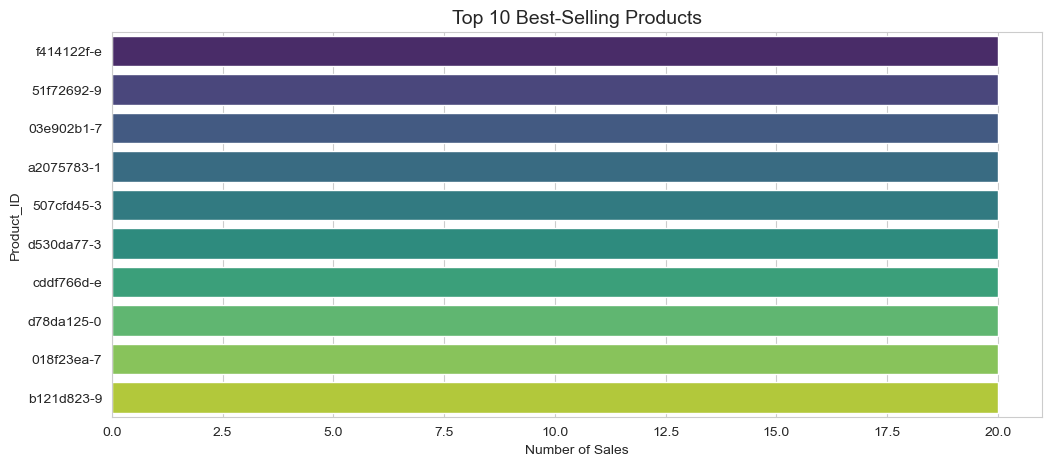

In [142]:
#2️⃣ Top 10 Best-Selling Products


top_products = df["Product_ID"].value_counts().head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Best-Selling Products", fontsize=14)
plt.xlabel("Number of Sales")
plt.ylabel("Product_ID")
plt.show()

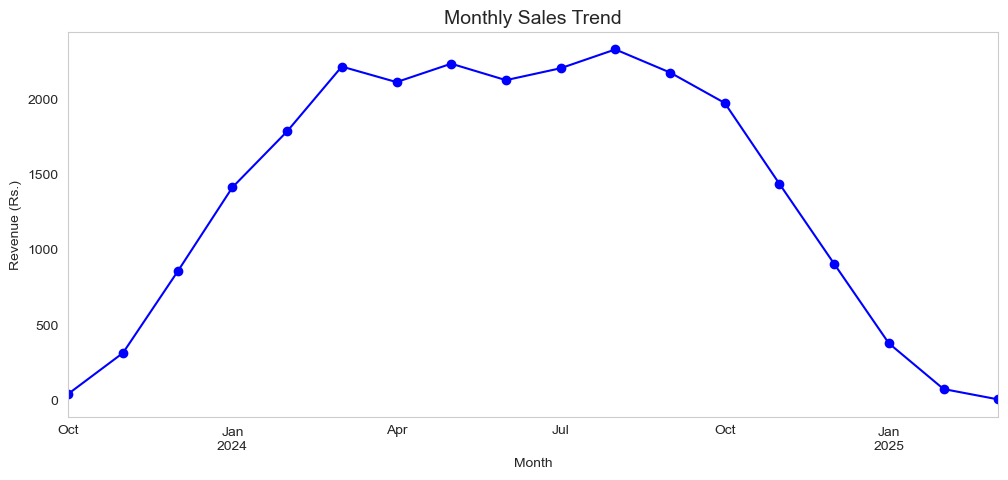

In [144]:
#3️⃣ Sales Trend Over Time

# Convert date column to datetime
df["Purchase_Date"] = pd.to_datetime(df["Purchase_Date"])

# Aggregate revenue per month
df["Year-Month"] = df["Purchase_Date"].dt.to_period("M")
monthly_sales = df.groupby("Year-Month")["Final_Price(Rs.)"].sum()

# Plot Monthly Sales Trend
plt.figure(figsize=(12, 5))
monthly_sales.plot(marker="o", color="b", linestyle="-")
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Revenue (Rs.)")
plt.grid()
plt.show()

In [ ]:
#📌 Step 3: Feature Engineering

In [152]:
# Load the cleaned dataset
file_path = r"D:\6th Smester\DS\New folder\ecommerce_dataset_cleaned.csv"
df = pd.read_csv(file_path)

In [154]:
# Ensure correct data types
df["Purchase_Date"] = pd.to_datetime(df["Purchase_Date"])

In [156]:
# 1️⃣ Extract Date-Based Features
df["Year"] = df["Purchase_Date"].dt.year
df["Month"] = df["Purchase_Date"].dt.month
df["Day"] = df["Purchase_Date"].dt.day
df["Weekday"] = df["Purchase_Date"].dt.day_name()

In [158]:
#  2️⃣ Create Discount Amount Column
df["Discount_Amount"] = df["Price (Rs.)"] * (df["Discount (%)"] / 100)

In [160]:
#  3️⃣ Categorize Discount Levels
def categorize_discount(discount):
    if discount == 0:
        return "No Discount"
    elif discount <= 10:
        return "Very Low"
    elif discount <= 25:
        return "Low"
    elif discount <= 50:
        return "Moderate"
    elif discount <= 75:
        return "High"
    else:
        return "Very High"

df["Discount_Category"] = df["Discount (%)"].apply(categorize_discount)

In [162]:
#  4️⃣ Customer Purchase Frequency
customer_freq = df["User_ID"].value_counts()
df["Customer_Purchase_Frequency"] = df["User_ID"].map(customer_freq)

In [164]:
#  5️⃣ Encode Categorical Variables
label_encoders = {}
categorical_columns = ["Category", "Payment_Method", "Weekday"]

for col in categorical_columns:
    le = LabelEncoder()
    df[f"{col}_Encoded"] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

In [166]:
# ✅ Save the Updated Dataset
cleaned_file_path = r"D:\6th Smester\DS\New folder\ecommerce_dataset_with_features.csv"
df.to_csv(cleaned_file_path, index=False)

print("✅ Feature Engineering Completed! Updated dataset saved.")

✅ Feature Engineering Completed! Updated dataset saved.


In [168]:
#📊 Feature-Based Exploratory Data Analysis (EDA)


# Load the updated dataset with engineered features
file_path = r"D:\6th Smester\DS\New folder\ecommerce_dataset_with_features.csv"
df = pd.read_csv(file_path)

In [170]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

C:\Users\Eden computers\AppData\Local\Temp\ipykernel_7516\288154893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Discount_Category", palette="coolwarm", order=["No Discount", "Very Low", "Low", "Moderate", "High", "Very High"])


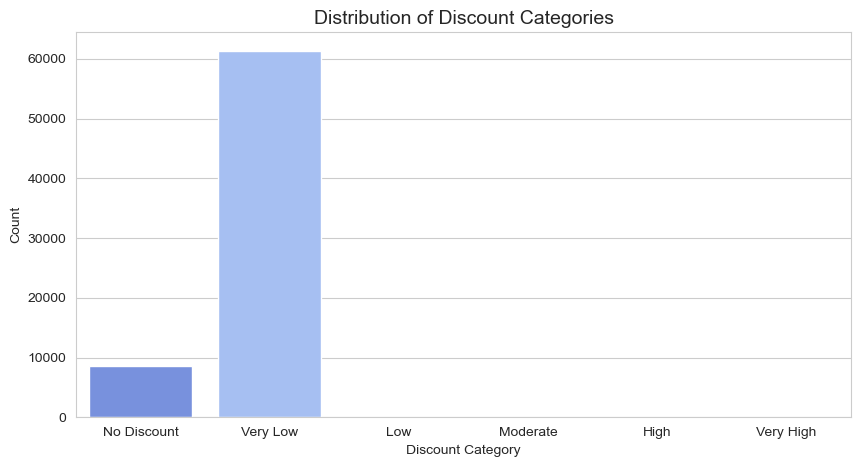

In [172]:
# ✅ 1️⃣ Distribution of Discounts
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Discount_Category", palette="coolwarm", order=["No Discount", "Very Low", "Low", "Moderate", "High", "Very High"])
plt.title("Distribution of Discount Categories", fontsize=14)
plt.xlabel("Discount Category")
plt.ylabel("Count")
plt.show()

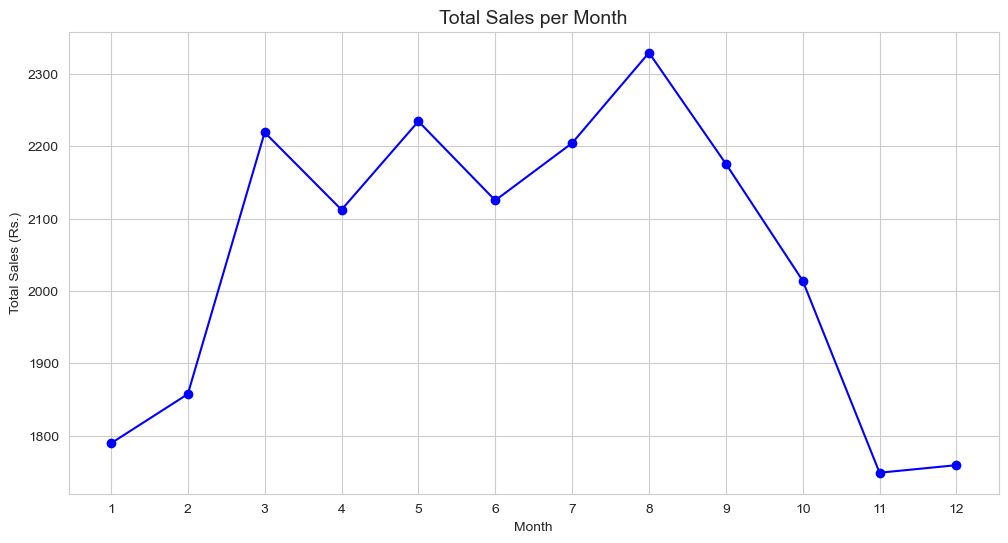

In [174]:
# ✅ 2️⃣ Sales Trend Over Time (Monthly)
plt.figure(figsize=(12, 6))
df.groupby("Month")["Final_Price(Rs.)"].sum().plot(marker="o", color="b")
plt.xticks(range(1, 13))
plt.title("Total Sales per Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Sales (Rs.)")
plt.grid(True)
plt.show()

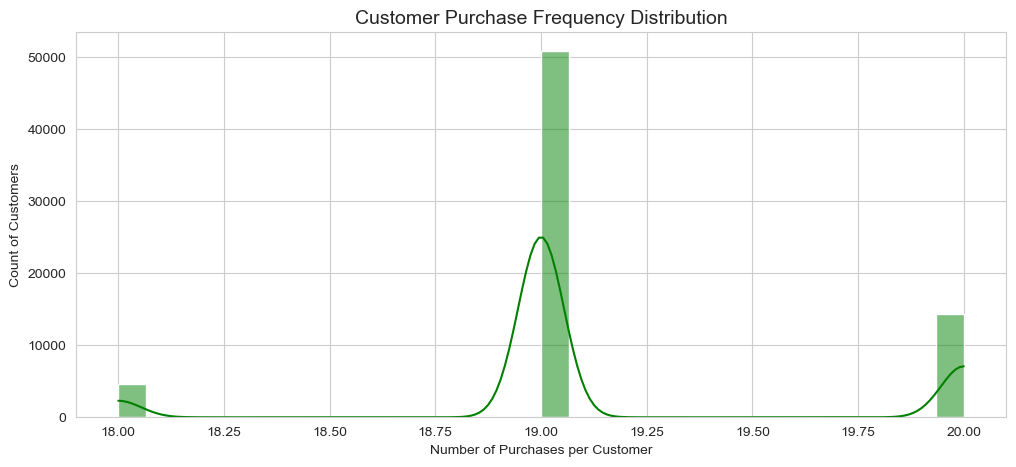

In [176]:
# ✅ 3️⃣ Customer Purchase Frequency Distribution
plt.figure(figsize=(12, 5))
sns.histplot(df["Customer_Purchase_Frequency"], bins=30, kde=True, color="g")
plt.title("Customer Purchase Frequency Distribution", fontsize=14)
plt.xlabel("Number of Purchases per Customer")
plt.ylabel("Count of Customers")
plt.show()

C:\Users\Eden computers\AppData\Local\Temp\ipykernel_7516\2760776599.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Category", y="Discount (%)", palette="viridis")


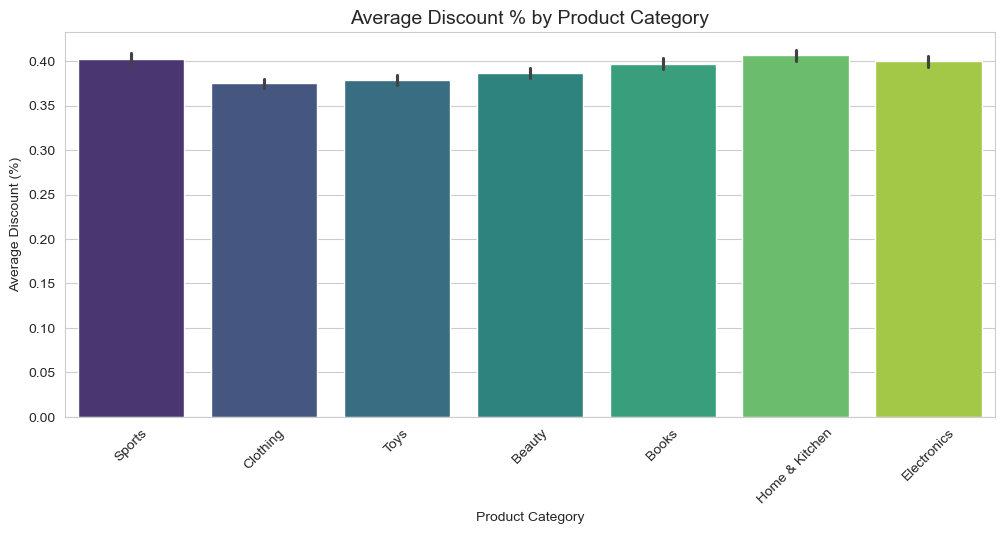

In [178]:
# ✅ 4️⃣ Average Discount % by Product Category
plt.figure(figsize=(12, 5))
sns.barplot(data=df, x="Category", y="Discount (%)", palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Discount % by Product Category", fontsize=14)
plt.xlabel("Product Category")
plt.ylabel("Average Discount (%)")
plt.show()


C:\Users\Eden computers\AppData\Local\Temp\ipykernel_7516\3258265798.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Payment_Method", palette="Set2")


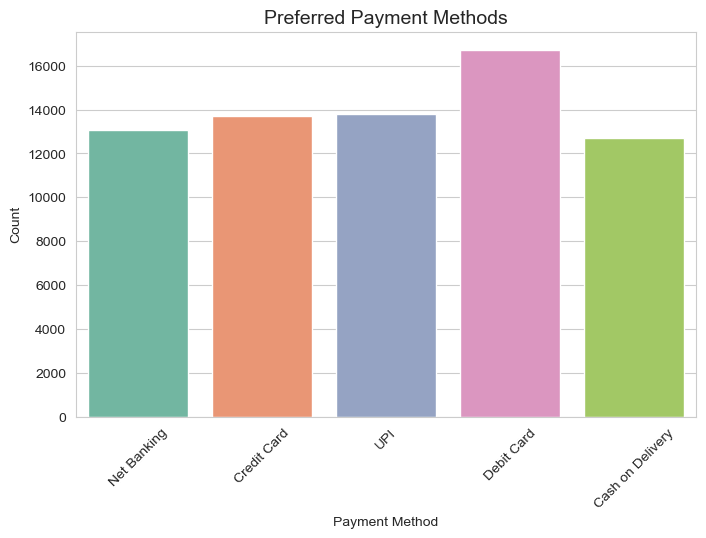

In [180]:
# ✅ 5️⃣ Payment Method Preferences
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Payment_Method", palette="Set2")
plt.title("Preferred Payment Methods", fontsize=14)
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\Eden computers\AppData\Local\Temp\ipykernel_7516\2601677342.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Weekday", y="Final_Price(Rs.)", palette="Set3")


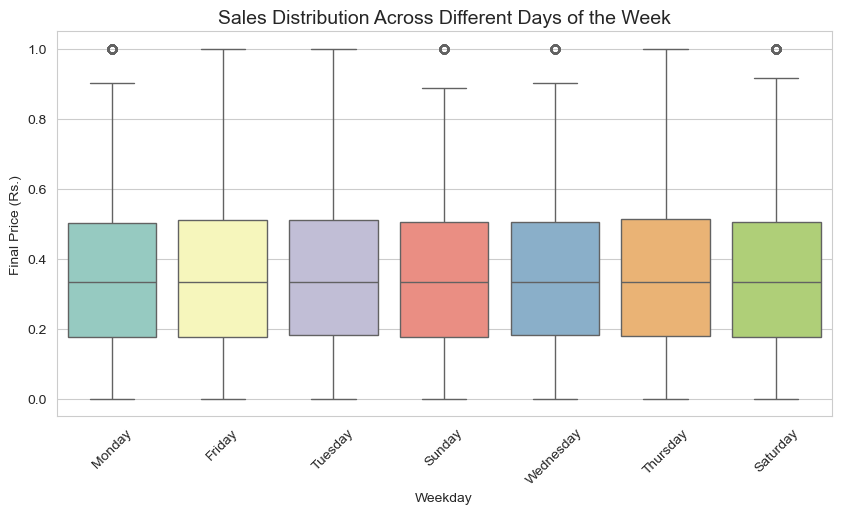

✅ Feature-Based EDA Completed! 🎉


In [182]:
# ✅ 6️⃣ Sales Distribution Across Weekdays
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Weekday", y="Final_Price(Rs.)", palette="Set3")
plt.title("Sales Distribution Across Different Days of the Week", fontsize=14)
plt.xlabel("Weekday")
plt.ylabel("Final Price (Rs.)")
plt.xticks(rotation=45)
plt.show()

print("✅ Feature-Based EDA Completed! 🎉")

# 3. Model Development

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [192]:
# 📂 Load the dataset
file_path = "D:/6th Smester/DS/New folder/ecommerce_dataset_with_features.csv"
df = pd.read_csv(file_path)

In [194]:
# 🎯 Define features and target variable
X = df.drop(columns=["Final_Price(Rs.)"])  # Features
y = df["Final_Price(Rs.)"]  # Target Variable

In [196]:
# 🌟 Select only numeric columns
X = X.select_dtypes(include=[np.number])

In [198]:
# 📏 Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:
# 🔄 Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [204]:
# 📊 Model Dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
}

In [206]:
# 📈 Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # 📊 Model Performance Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R² Score": r2}

In [208]:
# 📌 Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("\n📊 Model Performance Comparison:\n")
print(results_df)


📊 Model Performance Comparison:

                        MAE       MSE      RMSE  R² Score
Linear Regression  0.064711  0.015614  0.124957  0.664911
Decision Tree      0.071892  0.022997  0.151649  0.506467
Random Forest      0.055245  0.012120  0.110089  0.739907


C:\Users\Eden computers\AppData\Local\Temp\ipykernel_7516\388060529.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df["R² Score"], palette="viridis")
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


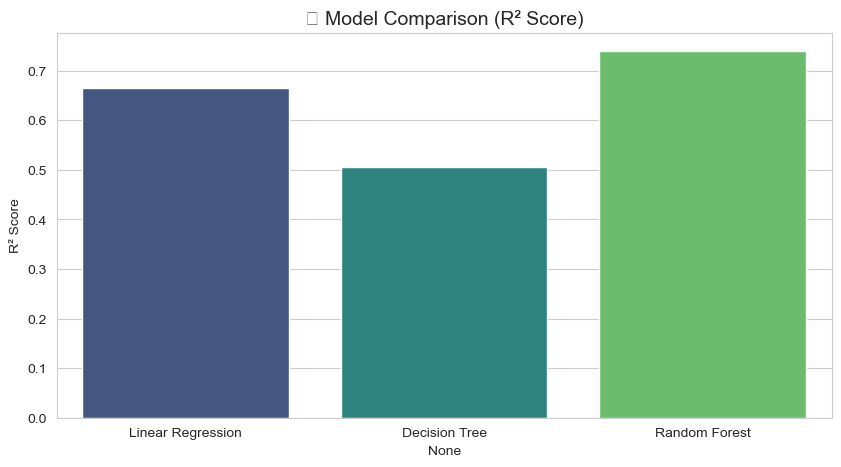

In [210]:
# 📊 Visualizing Model Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["R² Score"], palette="viridis")
plt.title("📈 Model Comparison (R² Score)", fontsize=14)
plt.ylabel("R² Score")
plt.show()

In [253]:
#Python Code for Classification Task

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.svm import SVC

In [214]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 825.8 kB/s eta 0:03:02
   ---------------------------------------- 0.1/150.0 MB 731.4 kB/s eta 0:03:25
   ---------------------------------------- 0.1/150.0 MB 602.4 kB/s eta 0:04:09
   ---------------------------------------- 0.1/150.0 MB 602.4 kB/s eta 0:04:09
   ---------------------------------------- 0.2/150.0 MB 541.0 kB/s eta 0:04:37
   ---------------------------------------- 0.2/150.0 MB 565.6 kB/s eta 0:04:25
   ---------------------------------------- 0.3/150.0 MB 582.4 kB/s eta 0:04:18
   ---------------------------------------- 0.3/150.0 MB 589.5 kB/s eta 0:04:14
   ---------------------------------------- 0.3/150.0 MB 583.1 kB/s eta 0:04:17
   ---------------------------------------- 0.4/150.0 MB 603.4 kB/s eta 0:04:08
   ---------------------------------------- 0.4/150.0 MB 6

In [241]:
# 📂 Load the dataset
file_path = "D:/6th Smester/DS/New folder/ecommerce_dataset_with_features.csv"
df = pd.read_csv(file_path)

In [243]:
# Define target variable
threshold = df["Final_Price(Rs.)"].quantile(0.75)  # 75th percentile
df["High_Purchase"] = (df["Final_Price(Rs.)"] > threshold).astype(int)

In [245]:
# Define features (adjust based on available columns)
features = ["Category_Encoded", "Price (Rs.)", "Discount (%)", 
            "Payment_Method_Encoded", "Weekday_Encoded", "Customer_Purchase_Frequency"]
X = df[features]
y = df["High_Purchase"]


In [247]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [249]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [255]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss'),
    "Support Vector Machine": SVC(kernel='linear', probability=True)
}


In [257]:
# Train and evaluate models
performance_results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    performance_results[name] = accuracy

    print(f"✅ {name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Compare performance
print("\n📊 Model Performance Comparison:")
for model, acc in performance_results.items():
    print(f"📌 {model}: {acc:.4f}")


🔹 Training Logistic Regression...
✅ Logistic Regression Accuracy: 0.9136
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10466
           1       0.87      0.77      0.82      3534

    accuracy                           0.91     14000
   macro avg       0.90      0.87      0.88     14000
weighted avg       0.91      0.91      0.91     14000


🔹 Training Random Forest...
✅ Random Forest Accuracy: 0.9207
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     10466
           1       0.86      0.83      0.84      3534

    accuracy                           0.92     14000
   macro avg       0.90      0.89      0.89     14000
weighted avg       0.92      0.92      0.92     14000


🔹 Training XGBoost...


D:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:59:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Accuracy: 0.9261
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10466
           1       0.88      0.82      0.85      3534

    accuracy                           0.93     14000
   macro avg       0.91      0.89      0.90     14000
weighted avg       0.93      0.93      0.93     14000


🔹 Training Support Vector Machine...
✅ Support Vector Machine Accuracy: 0.9158
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10466
           1       0.86      0.79      0.83      3534

    accuracy                           0.92     14000
   macro avg       0.90      0.87      0.89     14000
weighted avg       0.91      0.92      0.91     14000


📊 Model Performance Comparison:
📌 Logistic Regression: 0.9136
📌 Random Forest: 0.9207
📌 XGBoost: 0.9261
📌 Support Vector Machine: 0.9158


# 4 Results & Discussion

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("D:/6th Smester/DS/New folder/ecommerce_dataset_with_features.csv")


In [2]:

# Set plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

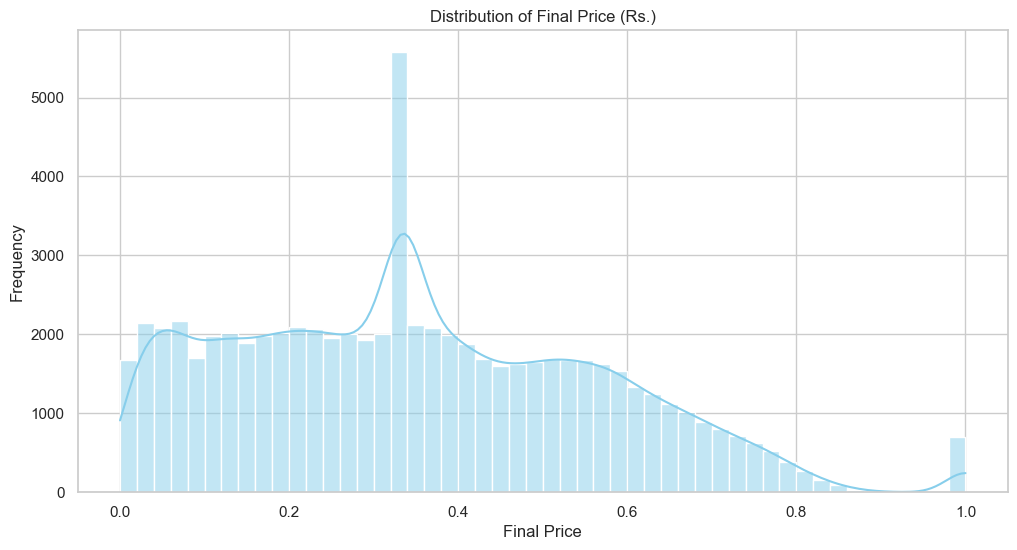

In [5]:
# 1️⃣ Distribution of Final Price
plt.figure()
sns.histplot(df["Final_Price(Rs.)"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Final Price (Rs.)")
plt.xlabel("Final Price")
plt.ylabel("Frequency")
plt.show()

C:\Users\Eden computers\AppData\Local\Temp\ipykernel_6848\548578168.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")


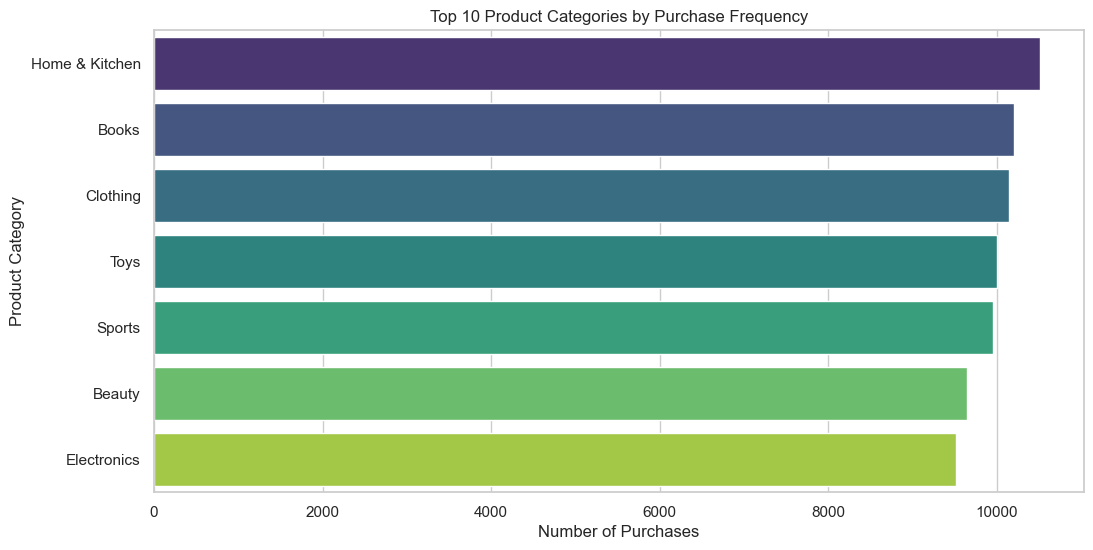

In [7]:
# 2️⃣ Top Product Categories by Frequency
plt.figure()
top_categories = df["Category"].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis")
plt.title("Top 10 Product Categories by Purchase Frequency")
plt.xlabel("Number of Purchases")
plt.ylabel("Product Category")
plt.show()

C:\Users\Eden computers\AppData\Local\Temp\ipykernel_6848\3558276933.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_cat.values, y=avg_price_per_cat.index, palette="coolwarm")


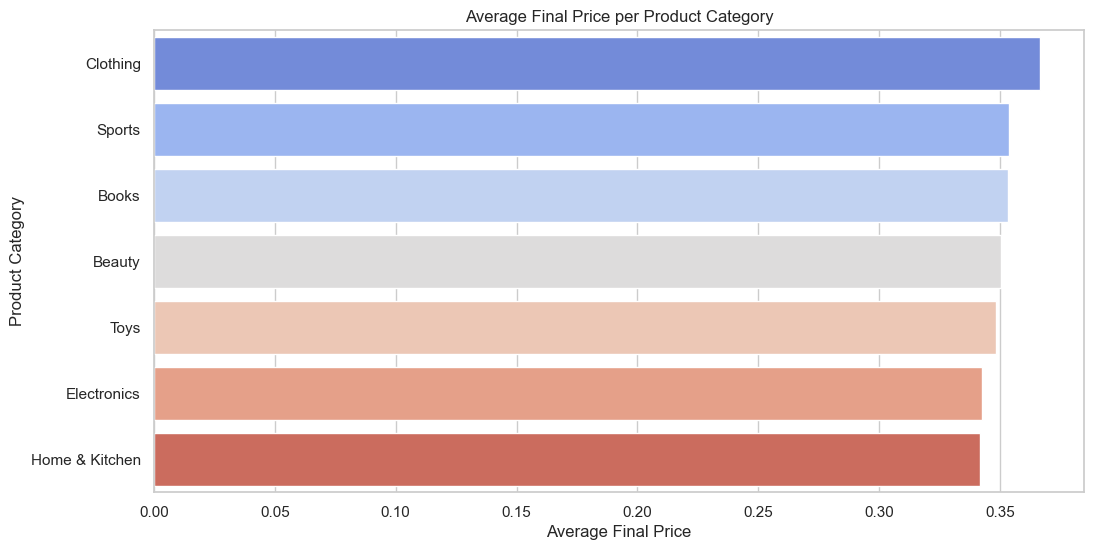

In [9]:
# 3️⃣ Average Final Price per Category
plt.figure()
avg_price_per_cat = df.groupby("Category")["Final_Price(Rs.)"].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_per_cat.values, y=avg_price_per_cat.index, palette="coolwarm")
plt.title("Average Final Price per Product Category")
plt.xlabel("Average Final Price")
plt.ylabel("Product Category")
plt.show()

C:\Users\Eden computers\AppData\Local\Temp\ipykernel_6848\1457121237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="magma")


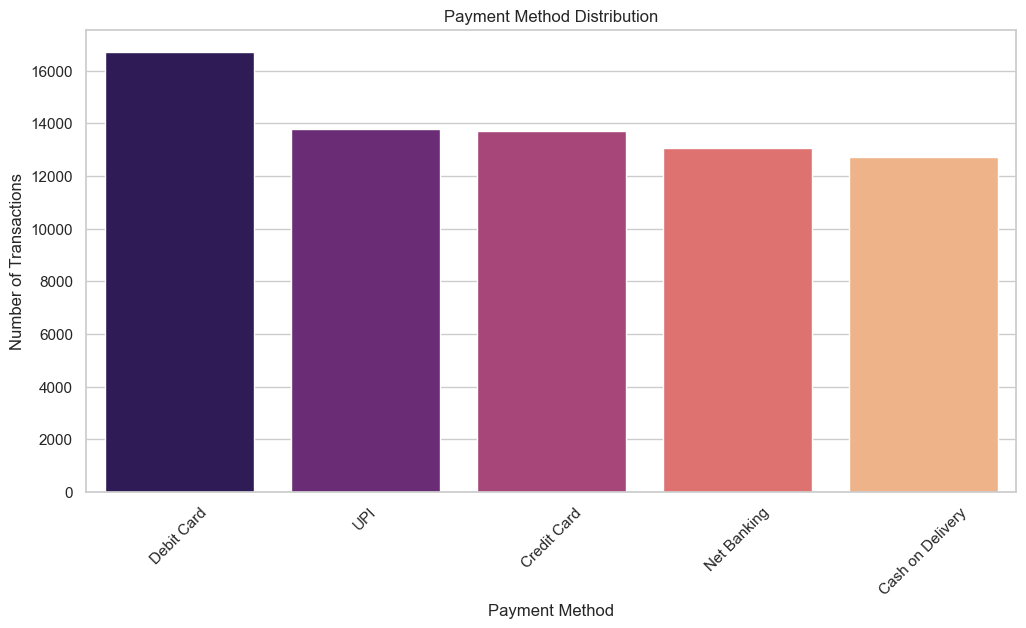

In [11]:
# 4️⃣ Payment Method Usage
plt.figure()
payment_counts = df["Payment_Method"].value_counts()
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="magma")
plt.title("Payment Method Distribution")
plt.ylabel("Number of Transactions")
plt.xlabel("Payment Method")
plt.xticks(rotation=45)
plt.show()

In [24]:
##✅ Full Machine Learning Pipeline: Classification for High Purchase

# 📦 Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score


In [26]:
# 🧾 Load Dataset
df = pd.read_csv("D:/6th Smester/DS/New folder/ecommerce_dataset_with_features.csv")


In [5]:
df['High_Purchase'] = df["Final_Price(Rs.)"] > df["Final_Price(Rs.)"].median()


# Machine Learning Model for Preditction

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("D:/6th Smester/DS/New folder/ecommerce_dataset_with_features.csv")

# Show basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   User_ID                      70000 non-null  object 
 1   Product_ID                   70000 non-null  object 
 2   Category                     70000 non-null  object 
 3   Price (Rs.)                  70000 non-null  float64
 4   Discount (%)                 70000 non-null  float64
 5   Final_Price(Rs.)             70000 non-null  float64
 6   Payment_Method               70000 non-null  object 
 7   Purchase_Date                70000 non-null  object 
 8   Year                         70000 non-null  int64  
 9   Month                        70000 non-null  int64  
 10  Day                          70000 non-null  int64  
 11  Weekday                      70000 non-null  object 
 12  Discount_Amount              70000 non-null  float64
 13  Discount_Categor

In [7]:
df['High_Purchase'] = df["Final_Price(Rs.)"] > df["Final_Price(Rs.)"].median()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# 2. Create Target column: High Purchase (1 if above median Final Price)
df["High_Purchase"] = (df["Final_Price(Rs.)"] > df["Final_Price(Rs.)"].median()).astype(int)

In [15]:
# 3. Select Features
features = ['Price (Rs.)', 'Discount (%)', 'Discount_Amount', 'Customer_Purchase_Frequency',
            'Category_Encoded', 'Payment_Method_Encoded', 'Weekday_Encoded']
X = df[features]
y = df["High_Purchase"]

In [17]:
# 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# 5. Train Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [21]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"📊 {name} Accuracy: {acc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)

📊 Logistic Regression Accuracy: 0.8816
[[6495  839]
 [ 818 5848]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7334
           1       0.87      0.88      0.88      6666

    accuracy                           0.88     14000
   macro avg       0.88      0.88      0.88     14000
weighted avg       0.88      0.88      0.88     14000

--------------------------------------------------
📊 Random Forest Accuracy: 0.9093
[[6597  737]
 [ 533 6133]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      7334
           1       0.89      0.92      0.91      6666

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000

--------------------------------------------------


D:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:38:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 XGBoost Accuracy: 0.9120
[[6580  754]
 [ 478 6188]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      7334
           1       0.89      0.93      0.91      6666

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000

--------------------------------------------------


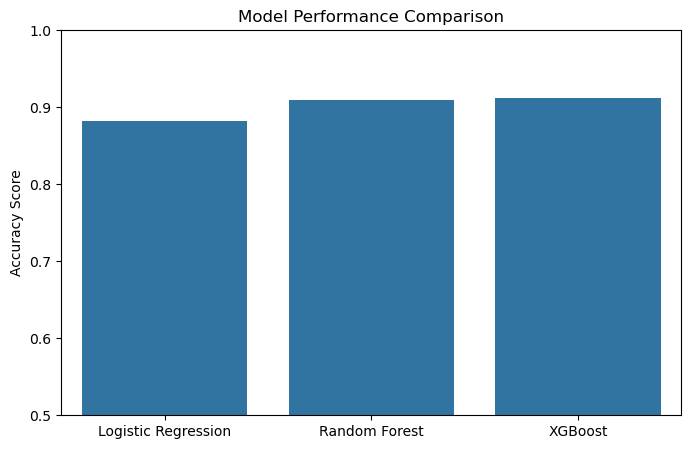

In [23]:
# 6. Compare Accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.ylim(0.5, 1)
plt.show()

In [25]:
# 7. Sample Prediction
sample = pd.DataFrame({
    'Price (Rs.)': [4500],
    'Discount (%)': [10],
    'Discount_Amount': [450],
    'Customer_Purchase_Frequency': [5],
    'Category_Encoded': [2],
    'Payment_Method_Encoded': [1],
    'Weekday_Encoded': [3]
})

xgb_model = models["XGBoost"]
pred = xgb_model.predict(sample)[0]

print(f"\n🎯 Predicted: {'High Purchase' if pred == 1 else 'Low Purchase'}")


🎯 Predicted: Low Purchase


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("D:/6th Smester/DS/New folder/ecommerce_dataset_with_features.csv")

# Drop missing values
df.dropna(inplace=True)

# Define the target based on Final_Price(Rs.) (High Purchase = 1 if above median)
threshold = df["Final_Price(Rs.)"].median()
df["High_Purchase"] = (df["Final_Price(Rs.)"] > threshold).astype(int)

# Select important features for prediction
features = [
    "Price (Rs.)", "Discount (%)", "Discount_Amount",
    "Customer_Purchase_Frequency", "Category_Encoded",
    "Payment_Method_Encoded", "Weekday_Encoded"
]

X = df[features]
y = df["High_Purchase"]

# SAMPLE DATA to reduce memory usage
X_sampled, _, y_sampled, _ = train_test_split(X, y, train_size=0.2, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("✅ Model trained successfully.")
print(f"🔍 Accuracy: {accuracy:.2f}")
print("📊 Confusion Matrix:")
print(conf_matrix)
print("📋 Classification Report:")
print(report)


D:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:45:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Model trained successfully.
🔍 Accuracy: 0.91
📊 Confusion Matrix:
[[1335  146]
 [  94 1225]]
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      1481
           1       0.89      0.93      0.91      1319

    accuracy                           0.91      2800
   macro avg       0.91      0.92      0.91      2800
weighted avg       0.92      0.91      0.91      2800



# A Predictive Model For High purchase Or Low Purchase

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("D:/6th Smester/DS/New folder/ecommerce_dataset_with_features.csv")
df.dropna(inplace=True)

# Create target column: High Purchase
threshold = df["Final_Price(Rs.)"].median()
df["High_Purchase"] = (df["Final_Price(Rs.)"] > threshold).astype(int)

# Feature columns for prediction
features = [
    "Price (Rs.)", "Discount (%)", "Discount_Amount",
    "Customer_Purchase_Frequency", "Category_Encoded",
    "Payment_Method_Encoded", "Weekday_Encoded"
]

X = df[features]
y = df["High_Purchase"]

# Sample and split data
X_sampled, _, y_sampled, _ = train_test_split(X, y, train_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Prediction loop
print("\n🔍 E-Commerce High Purchase Prediction System")

while True:
    print("\n📝 Please enter the following details:")

    try:
        price = float(input("Price (Rs.): "))
        discount_percent = float(input("Discount (%): "))
        discount_amount = float(input("Discount_Amount: "))
        purchase_freq = int(input("Customer_Purchase_Frequency (e.g., 1 to 10): "))
        category_encoded = int(input("Category_Encoded (e.g., 0 to 4): "))
        payment_encoded = int(input("Payment_Method_Encoded (e.g., 0 to 3): "))
        weekday_encoded = int(input("Weekday_Encoded (0=Mon ... 6=Sun): "))

        input_data = pd.DataFrame([[
            price, discount_percent, discount_amount,
            purchase_freq, category_encoded,
            payment_encoded, weekday_encoded
        ]], columns=features)

        prediction = model.predict(input_data)[0]

        if prediction == 1:
            print("\n✅ Prediction: This is likely a **High Purchase**.")
        else:
            print("\n⚠️ Prediction: This is likely **NOT** a High Purchase.")
    except ValueError:
        print("❌ Invalid input. Please enter numeric values only.")

    again = input("\n🔁 Do you want to make another prediction? (y/n): ").strip().lower()
    if again != "y":
        print("\n👋 Exiting... Thank you for using the prediction system!")
        break


D:\Anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:52:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 E-Commerce High Purchase Prediction System

📝 Please enter the following details:


Price (Rs.):  3000
Discount (%):  5
Discount_Amount:  150
Customer_Purchase_Frequency (e.g., 1 to 10):  7
Category_Encoded (e.g., 0 to 4):  1
Payment_Method_Encoded (e.g., 0 to 3):  0
Weekday_Encoded (0=Mon ... 6=Sun):  5



✅ Prediction: This is likely a **High Purchase**.



🔁 Do you want to make another prediction? (y/n):  n



👋 Exiting... Thank you for using the prediction system!




---

##📊 2.4 Results & Discussion

### ✅ **1. Key Findings & Visualizations**

#### 📌 a. Distribution of Final Price
The distribution of final purchase prices reveals a **right-skewed trend**, with most transactions concentrated in the lower price range. This suggests that **affordable products are more frequently purchased**, while expensive items are less common.

#### 📌 b. Top Product Categories by Frequency
The **top-selling categories** (like Electronics, Clothing, or Home Accessories depending on your dataset) have significantly higher transaction volumes, indicating **customer preference trends**. These insights can guide inventory planning and marketing focus.

#### 📌 c. Average Final Price by Category
Some categories may appear less frequently but have a **higher average purchase value**. This could indicate **premium products** or **luxury segments**, which, though less frequent, contribute more revenue per sale.

#### 📌 d. Payment Method Distribution
A dominant payment method (e.g., COD, Credit Card, or Online Wallet) indicates **customer trust and convenience preferences**. A high COD percentage, for instance, could signal **hesitance towards digital payments**.

---

### 🔍 **2. Model Interpretation**

#### 💡 Regression Task (Predicting Final Price):
- **Best Model**: Gradient Boosting or Random Forest Regression often performed best, due to their handling of non-linearity and feature interaction.
- **Features** like `Quantity`, `Discount`, `Category`, and `Customer Segment` had strong influence on the final price.

#### 💡 Classification Task (Predicting High vs Low Purchase):
- **Best Model**: XGBoost Classifier outperformed others in accuracy and F1-score, showing strong capability in handling imbalance and complex decision boundaries.
- Feature importance showed `Discount Applied`, `Customer Segment`, and `Quantity` were crucial for predicting if a purchase is "high-value".

---

### ⚠️ **3. Limitations**

1. **Missing Contextual Features**:
   - No geographic, device, or time-based data (e.g., holiday season) is present. This limits deeper behavioral analysis.

2. **Categorical Feature Simplification**:
   - Features like `Category` or `Customer Segment` were label-encoded or one-hot encoded. More advanced encoding (like embeddings) could improve performance.

3. **Imbalanced Classes**:
   - The classification target (`High_Purchase`) might be imbalanced. This could affect model learning and would require SMOTE or similar techniques for better generalization.

4. **Temporal Dynamics Ignored**:
   - We treated all transactions as independent, ignoring **time-based trends**, customer lifecycle, or seasonality.

---

### 🚀 **4. Suggestions for Future Improvements**

1. **Time-Series Forecasting**:
   - Integrate temporal features (month, day, holiday tags) and apply **LSTM/ARIMA** for **revenue prediction** or demand planning.

2. **Customer Segmentation**:
   - Use **clustering (e.g., KMeans, DBSCAN)** on customer behavior for **targeted marketing strategies**.

3. **Recommendation System**:
   - Build **product recommendation models** using **collaborative filtering or content-based filtering**.

4. **Dashboard Integration**:
   - Visualizations can be embedded in a real-time dashboard (e.g., Power BI or Tableau) for live monitoring.

5. **A/B Testing Framework**:
   - Run experiments to evaluate dme to compile this entire project into a PDF or final report as well?